<a href="https://colab.research.google.com/github/unicornpjs/Dubai_UG_3/blob/main/UG3_Linear_regression_combined_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompts you to upload your dataset files
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving atlantic.csv to atlantic.csv


In [2]:
# prompts you to upload your dataset files
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving pacific.csv to pacific.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [19]:
atlantichurricanedata = pd.read_csv('atlantic.csv')
pacifichurricanedata = pd.read_csv('pacific.csv')

In [20]:
atlantichurricanedata.columns = atlantichurricanedata.columns.str.strip()
pacifichurricanedata.columns = pacifichurricanedata.columns.str.strip()

In [21]:
# Function to clean 'Latitude' and 'Longitude' columns
def clean_coordinates(data):
  data['Latitude'] = pd.to_numeric(data['Latitude'].str.replace('N', '').str.replace('S', '-'), errors='coerce')
  data['Longitude'] = pd.to_numeric(data['Longitude'].str.replace('E', '').str.replace('W', '-'), errors='coerce')
  return data.dropna(subset=['Latitude', 'Longitude'])

In [22]:
# Clean the datasets
pacifichurricanedata_clean = clean_coordinates(pacifichurricanedata)
atlantichurricanedata_clean = clean_coordinates(atlantichurricanedata)

In [23]:
# Combine the datasets
combined_data = pd.concat([pacifichurricanedata_clean, atlantichurricanedata_clean], ignore_index=True)

In [24]:
# Use 'Latitude' as predictor (X) and 'Longitude' as response (y)
X_combined = combined_data['Latitude'].values.reshape(-1, 1)
y_combined = combined_data['Longitude'].values

In [25]:
# Create a linear regression model
model_combined = LinearRegression()

In [26]:
# Fit the model to the data
model_combined.fit(X_combined, y_combined)

LinearRegression()

In [27]:
# Predict values using the model
y_pred_combined = model_combined.predict(X_combined)

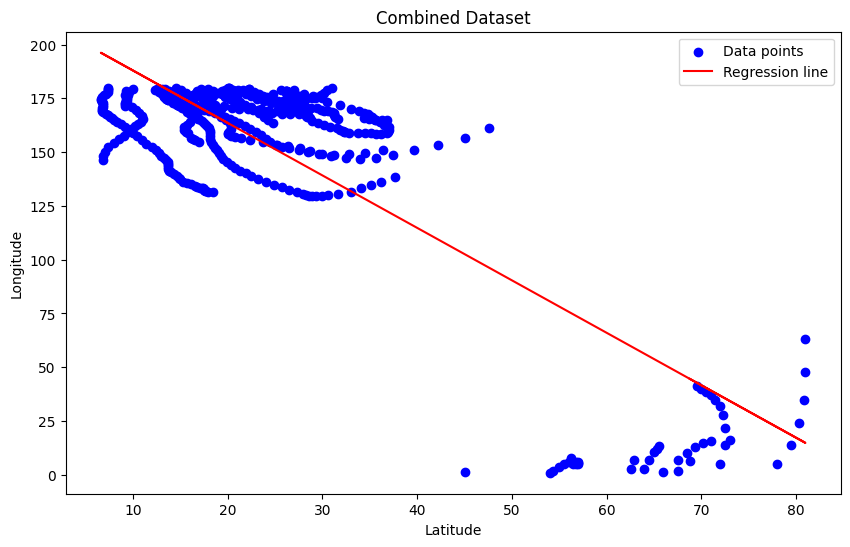

In [28]:
# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_combined, y_combined, color='blue', label='Data points')
plt.plot(X_combined, y_pred_combined, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Combined Dataset')
plt.legend()
plt.show()

In [29]:
# Print the coefficients
print('Combined Dataset - Intercept:', model_combined.intercept_)
print('Combined Dataset - Slope:', model_combined.coef_[0])

Combined Dataset - Intercept: 212.28432642939924
Combined Dataset - Slope: -2.437221479226955
